In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [6]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [7]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 3233 to 2673
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   int8   
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                5110 non-null   float64
 7   smoking_status     5110 non-null   int8   
 8   stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), int8(2)
memory usage: 329.4 KB


In [26]:
data.describe()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414090,43.226614,0.097456,0.054012,2.167710,106.147677,28.893237,1.376908,0.048728
std,0.492612,22.612647,0.296607,0.226063,1.090293,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,2.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,2.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,3.000000,114.090000,32.800000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,4.000000,271.740000,97.600000,3.000000,1.000000


In [27]:
data.head(10) #  show top 10  of data 

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
3233,1,2.0,0,0,4,93.55,23.3,0,0
1802,1,22.0,0,0,2,85.57,24.2,1,0
1121,0,69.0,0,0,3,113.10,22.7,2,0
635,1,57.0,0,0,2,98.54,30.2,2,0
1450,0,2.0,0,0,4,65.96,19.7,0,0
3582,1,53.0,0,0,0,83.68,26.7,0,0
2492,0,48.0,0,0,0,75.91,27.8,0,0
2622,1,42.0,0,0,2,110.68,32.4,1,0
3604,0,36.0,0,0,2,71.32,43.9,3,0
3551,0,43.0,0,0,2,68.94,26.8,2,0


In [28]:
data.shape # ## Show data statistical features

(5110, 9)

In [29]:
data['work_type'].value_counts() # data analisys


2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

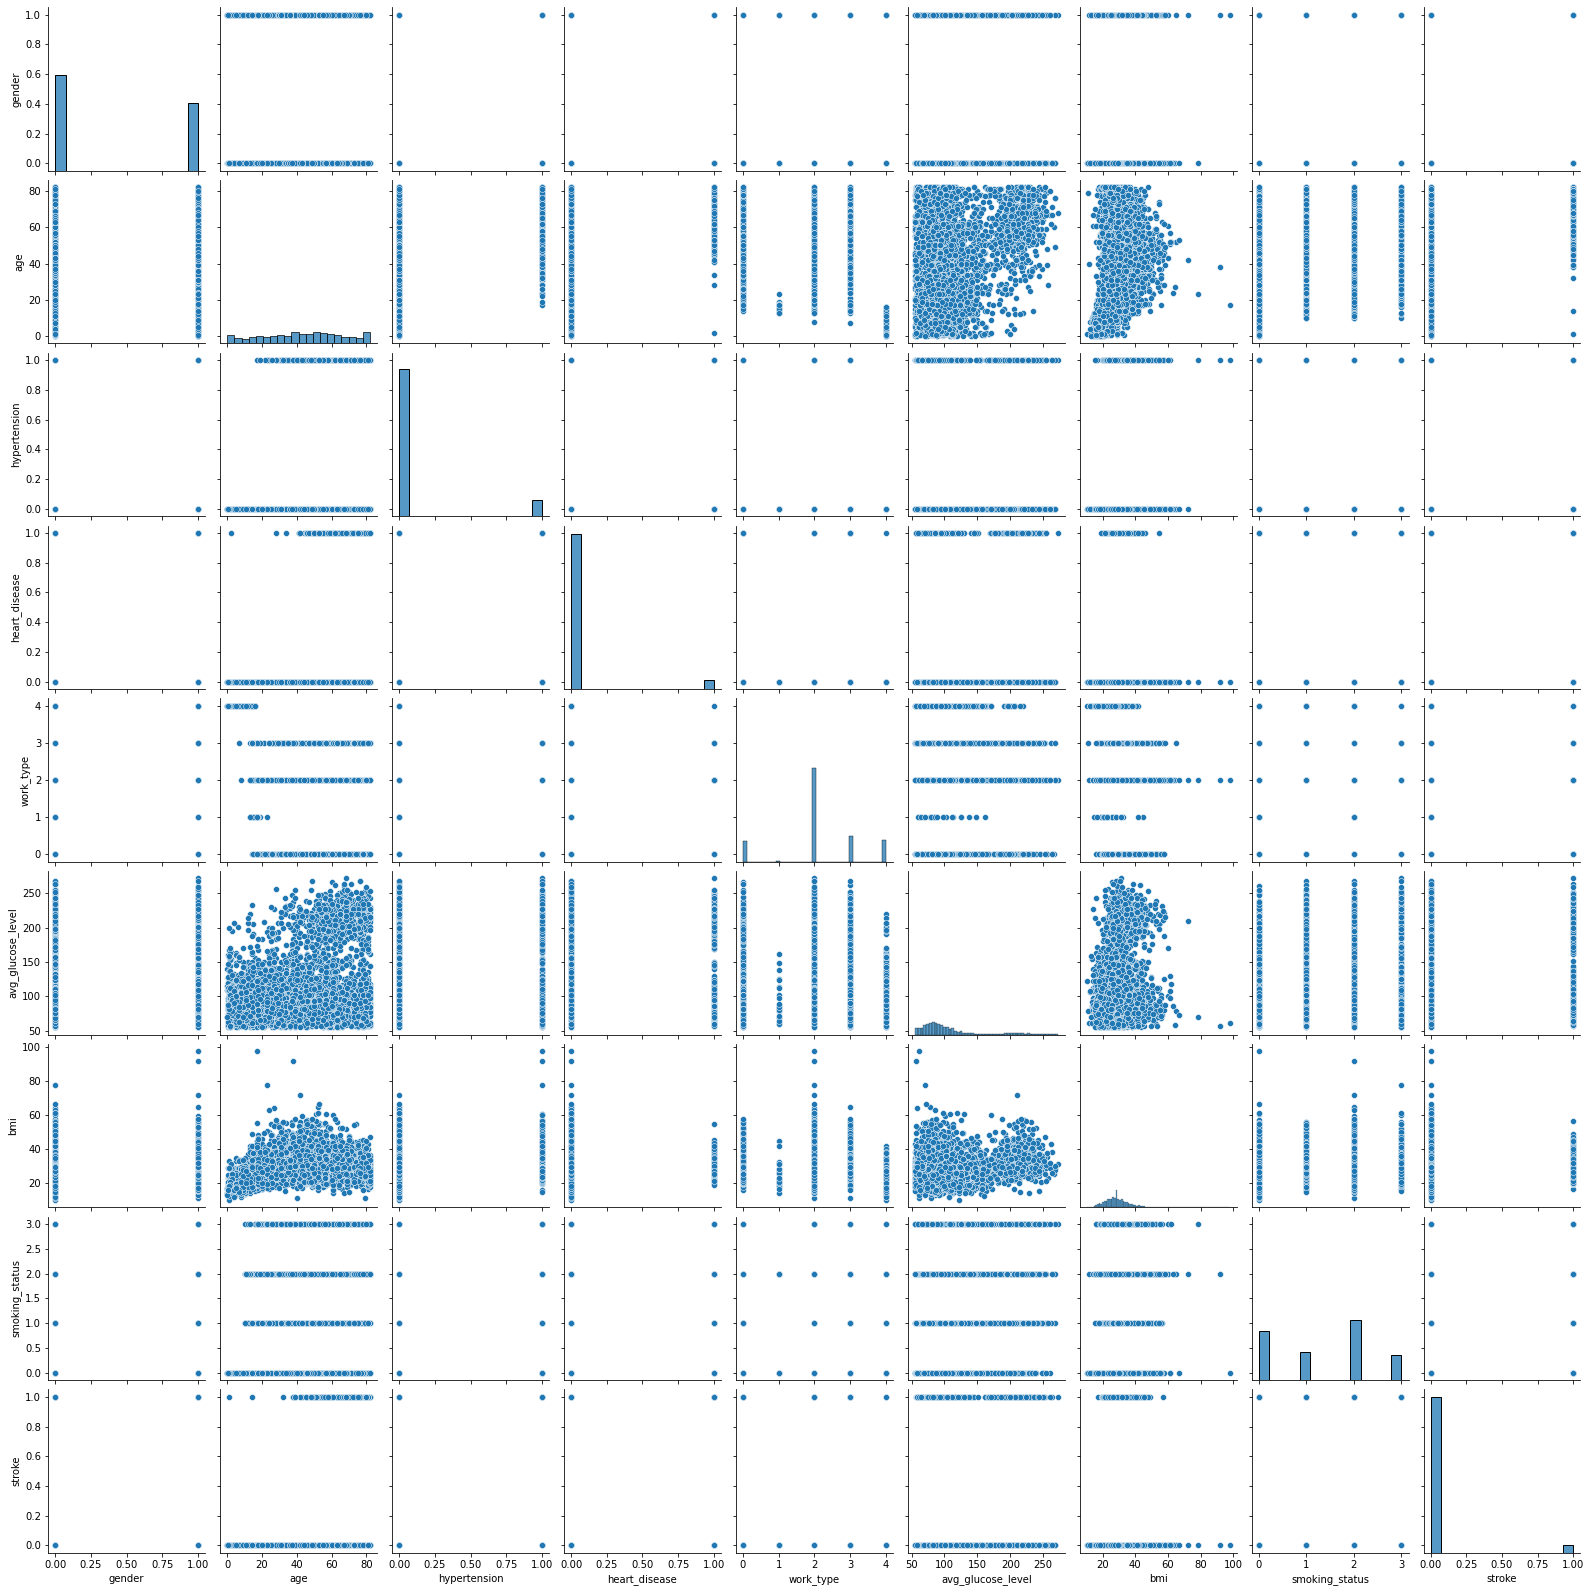

In [30]:
sns.pairplot(data)

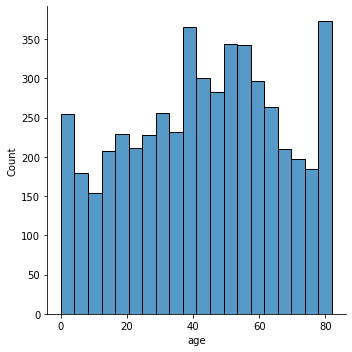

In [31]:
data['age'].nunique()
# Returns number of unique values in this attribute
sns.displot(data['age'])
# This will plot a distribution plot of variable age

<AxesSubplot:xlabel='stroke', ylabel='age'>

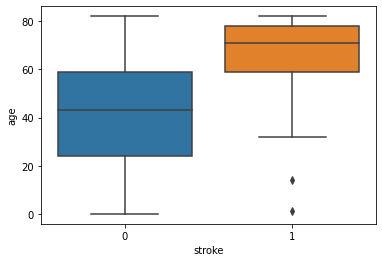

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='stroke',y='age')

<AxesSubplot:>

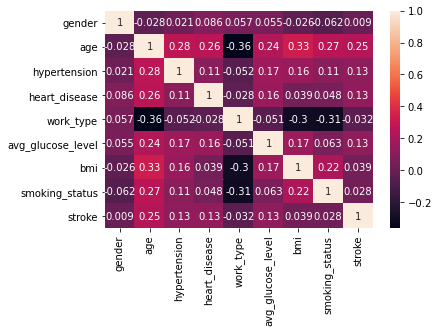

In [39]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>

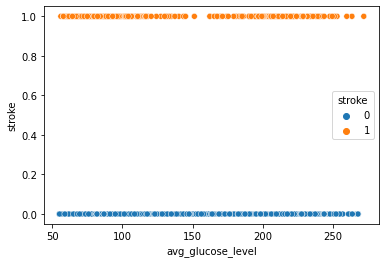

In [40]:
sns.scatterplot(data= data, x='avg_glucose_level', y='stroke', hue='stroke')

In [41]:
data[['avg_glucose_level', 'stroke']].corr()

,avg_glucose_level,stroke
avg_glucose_level,1.000000,0.131945
stroke,0.131945,1.000000


In [42]:
y = data['stroke']
print(f'Percentage of pepole has a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} -->\
({y.value_counts()[1]})\n Percentage of pepole does not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)}  ({y.value_counts()[0]})')

Percentage of pepole has a stroke: % 4.87 -->(249)
 Percentage of pepole does not have a stroke: % 95.13  (4861)


In [43]:
print (f'A person with hypertension has a probability of {round(data[data["hypertension"]==1]["stroke"].mean()*100,2)} % get a stroke')
print()

print (f'A person without hypertension has a probability of  {round(data[data["hypertension"]==0]["stroke"].mean()*100,2)} % get a stroke')

A person with hypertension has a probability of 13.25 % get a stroke

A person without hypertension has a probability of  3.97 % get a stroke


In [37]:
data

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
3233,1,2.0,0,0,4,93.55,23.3,0,0
1802,1,22.0,0,0,2,85.57,24.2,1,0
1121,0,69.0,0,0,3,113.10,22.7,2,0
635,1,57.0,0,0,2,98.54,30.2,2,0
1450,0,2.0,0,0,4,65.96,19.7,0,0
...,...,...,...,...,...,...,...,...,...
302,1,44.0,0,0,2,81.84,25.1,2,0
3119,0,20.0,0,0,2,147.42,26.6,0,0
4294,0,11.0,0,0,4,94.89,27.5,2,0
122,1,80.0,0,0,2,259.63,31.7,3,1


In [9]:
from sklearn.utils import shuffle
data = shuffle(data)

In [10]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3233,29017,Male,2.0,0,0,No,children,Urban,93.55,23.3,Unknown,0
1802,63668,Male,22.0,0,0,No,Private,Rural,85.57,24.2,formerly smoked,0
1121,62756,Female,69.0,0,0,Yes,Self-employed,Urban,113.10,22.7,never smoked,0
635,52512,Male,57.0,0,0,Yes,Private,Rural,98.54,30.2,never smoked,0
1450,70259,Female,2.0,0,0,No,children,Rural,65.96,19.7,Unknown,0


In [11]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [44]:
data['bmi'].fillna(value=data['bmi'].mean(), inplace=True)
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
3233,1,2.0,0,0,4,93.55,23.3,0,0
1802,1,22.0,0,0,2,85.57,24.2,1,0
1121,0,69.0,0,0,3,113.10,22.7,2,0
635,1,57.0,0,0,2,98.54,30.2,2,0
1450,0,2.0,0,0,4,65.96,19.7,0,0


In [13]:
data =data.drop(columns = ['id','ever_married','Residence_type'],axis =1)
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
3233,Male,2.0,0,0,children,93.55,23.3,Unknown,0
1802,Male,22.0,0,0,Private,85.57,24.2,formerly smoked,0
1121,Female,69.0,0,0,Self-employed,113.10,22.7,never smoked,0
635,Male,57.0,0,0,Private,98.54,30.2,never smoked,0
1450,Female,2.0,0,0,children,65.96,19.7,Unknown,0


In [14]:
data = data.replace(to_replace = 'Male', value = 1)
data = data.replace(to_replace = 'Female', value = 0)
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
3233,1,2.0,0,0,children,93.55,23.3,Unknown,0
1802,1,22.0,0,0,Private,85.57,24.2,formerly smoked,0
1121,0,69.0,0,0,Self-employed,113.10,22.7,never smoked,0
635,1,57.0,0,0,Private,98.54,30.2,never smoked,0
1450,0,2.0,0,0,children,65.96,19.7,Unknown,0


In [15]:
data.gender.value_counts()

0        2994
1        2115
Other       1
Name: gender, dtype: int64

In [16]:
data = data.replace(to_replace = 'Other',value = 1)
data.gender.value_counts()

0    2994
1    2116
Name: gender, dtype: int64

In [17]:
data["work_type"] = data["work_type"].astype("category")
data["work_type"] = data["work_type"].cat.codes
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
3233,1,2.0,0,0,4,93.55,23.3,Unknown,0
1802,1,22.0,0,0,2,85.57,24.2,formerly smoked,0
1121,0,69.0,0,0,3,113.10,22.7,never smoked,0
635,1,57.0,0,0,2,98.54,30.2,never smoked,0
1450,0,2.0,0,0,4,65.96,19.7,Unknown,0


In [18]:
data["smoking_status"] = data["smoking_status"].astype("category")
data["smoking_status"] = data["smoking_status"].cat.codes
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
3233,1,2.0,0,0,4,93.55,23.3,0,0
1802,1,22.0,0,0,2,85.57,24.2,1,0
1121,0,69.0,0,0,3,113.10,22.7,2,0
635,1,57.0,0,0,2,98.54,30.2,2,0
1450,0,2.0,0,0,4,65.96,19.7,0,0


In [19]:
X = data.drop(columns = 'stroke',axis =1)
y = data['stroke']

In [20]:
X

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
3233,1,2.0,0,0,4,93.55,23.3,0
1802,1,22.0,0,0,2,85.57,24.2,1
1121,0,69.0,0,0,3,113.10,22.7,2
635,1,57.0,0,0,2,98.54,30.2,2
1450,0,2.0,0,0,4,65.96,19.7,0
...,...,...,...,...,...,...,...,...
302,1,44.0,0,0,2,81.84,25.1,2
3119,0,20.0,0,0,2,147.42,26.6,0
4294,0,11.0,0,0,4,94.89,27.5,2
122,1,80.0,0,0,2,259.63,31.7,3


In [18]:
y

1705    0
2835    0
1022    0
3769    0
492     0
       ..
1406    0
3146    0
3629    0
3707    0
649     0
Name: stroke, Length: 5110, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 7,shuffle ='True')

In [23]:
logistic_reg_model = LogisticRegression(random_state =42)
logistic_reg_model.fit(X_train,y_train)

C:\Users\noora 1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [38]:
predict_train_data = logistic_reg_model.predict(X_test)
acc = accuracy_score(y_test,predict_train_data)
accuracy = acc*100
print(str(accuracy)+"%")

95.30516431924883%
